In [63]:
import re
import os
import pandas as pd
import bs4
import numpy as np
import requests
import pickle as pkl
import csv
import networkx as nx
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from sklearn.metrics.pairwise import cosine_similarity
import _pickle as cpickle


import matplotlib.pyplot as plt
from tqdm import tqdm

In [64]:
DG = nx.read_gpickle("kg_srl/vanitas_meaning_KG_SRL_train.gpickle")

In [65]:
DG

In [66]:
tag2object = ['skull', 'hourglass', 'globe', 'coins', 'butterfly', 'flowers', 'watch', 'dice', 'fruit', 'violin',
        'lute', 'flute', 'candle', 'inkstand', 'music', 'bubble', 'lamp', 'book', 'glass', 'goblet', 'vase',
        'crown', 'mitre', 'mitre', 'crab', 'lobster', 'shells', 'bird', 'atlas',
        'clock', 'fish', 'smoke', 'bread', 'wine', 'shells']

def get_object_meaning(index):
    pass


In [67]:
object2meanings = {}

subgraph_nodes = []
mapping = {}

# removing stopwords would be fine
# partition the graph

for object in tag2object:
    object2meanings[object] = []
    meanings = []
    for node in DG.nodes:
        if object in node.lower():
            subgraph_nodes.append(object)
            subgraph_nodes.extend([child for child in DG.successors(node)])
            mapping[node] = object
            
#             print(object, node, nx.descendants(DG, node))
#             meanings.append(nx.descendants(DG, node))
            print(object, node, [child for child in DG.successors(node)])
            meanings.append([child for child in DG.successors(node)])
    object2meanings[object].append(meanings)


skull skulls ['reminder', 'certainty', 'death']
skull skull ['universal symbol', 'death', 'form', ' living head', 'life', 'real']
flowers flowers ['life']
watch mechanical watch ['transience', 'time']
watch watch ['passing', 'time']
fruit rotten fruit ['easy']
fruit Mature fruits ['fertility', 'abundance']
fruit fruit ['symbol', 'viewers']
candle gutted candles ['easy']
candle extinguished candle ['life']
music music []
music Musical Instruments []
bubble soap bubble []
bubble bubbles ['life']
book Book []
book book ['reminders', 'mortality', 'skull']
book bookmarks []
glass glass ['death']
glass Glass ['fragility']
vase Rich vases ['ostentation']
crown crowns ['leaves', 'powers', ' signs', 'transient earthly Dominion', 'heavenly world order']
clock gold clock ['time']
wine wine []


In [68]:
object2meanings

{'skull': [[['reminder', 'certainty', 'death'],
   ['universal symbol', 'death', 'form', ' living head', 'life', 'real']]],
 'hourglass': [[]],
 'globe': [[]],
 'coins': [[]],
 'butterfly': [[]],
 'flowers': [[['life']]],
 'watch': [[['transience', 'time'], ['passing', 'time']]],
 'dice': [[]],
 'fruit': [[['easy'], ['fertility', 'abundance'], ['symbol', 'viewers']]],
 'violin': [[]],
 'lute': [[]],
 'flute': [[]],
 'candle': [[['easy'], ['life']]],
 'inkstand': [[]],
 'music': [[[], []]],
 'bubble': [[[], ['life']]],
 'lamp': [[]],
 'book': [[[], ['reminders', 'mortality', 'skull'], []]],
 'glass': [[['death'], ['fragility']]],
 'goblet': [[]],
 'vase': [[['ostentation']]],
 'crown': [[['leaves',
    'powers',
    ' signs',
    'transient earthly Dominion',
    'heavenly world order']]],
 'mitre': [[]],
 'crab': [[]],
 'lobster': [[]],
 'shells': [[]],
 'bird': [[]],
 'atlas': [[]],
 'clock': [[['time']]],
 'fish': [[]],
 'smoke': [[]],
 'bread': [[]],
 'wine': [[[]]]}

In [69]:
H = nx.relabel_nodes(DG, mapping)

In [70]:
SG = H.subgraph(subgraph_nodes)

In [71]:
l = [n for n in SG.nodes if SG.nodes[n]['bipartite'] == 0]
r = set(SG.nodes) - set(l)


In [72]:
list(l)

['viewers',
 'crown',
 'death',
 'watch',
 'bubble',
 'vase',
 'candle',
 'clock',
 'fruit',
 'glass',
 'form',
 'skull',
 'flowers']

In [73]:
SG = H.subgraph(subgraph_nodes)

In [74]:
# Separate by group
# B = SG
# pos = {}

# # Update position for node from each group
# pos.update((node, (1, index)) for index, node in enumerate(l))
# pos.update((node, (2, index)) for index, node in enumerate(r))

# nx.draw(B, pos=pos, edge_color='black', width=1, linewidths=1,
#             node_size=500, arrowsize=0.001, node_color='seagreen', alpha=0.9,
#             labels={node: node for node in SG.nodes()}, font_size=20)
# plt.show()

In [75]:
list(l)

['viewers',
 'crown',
 'death',
 'watch',
 'bubble',
 'vase',
 'candle',
 'clock',
 'fruit',
 'glass',
 'form',
 'skull',
 'flowers']

(-1.1939183180089785,
 1.0407594419040114,
 -1.097638444376693,
 1.0466604561644424)

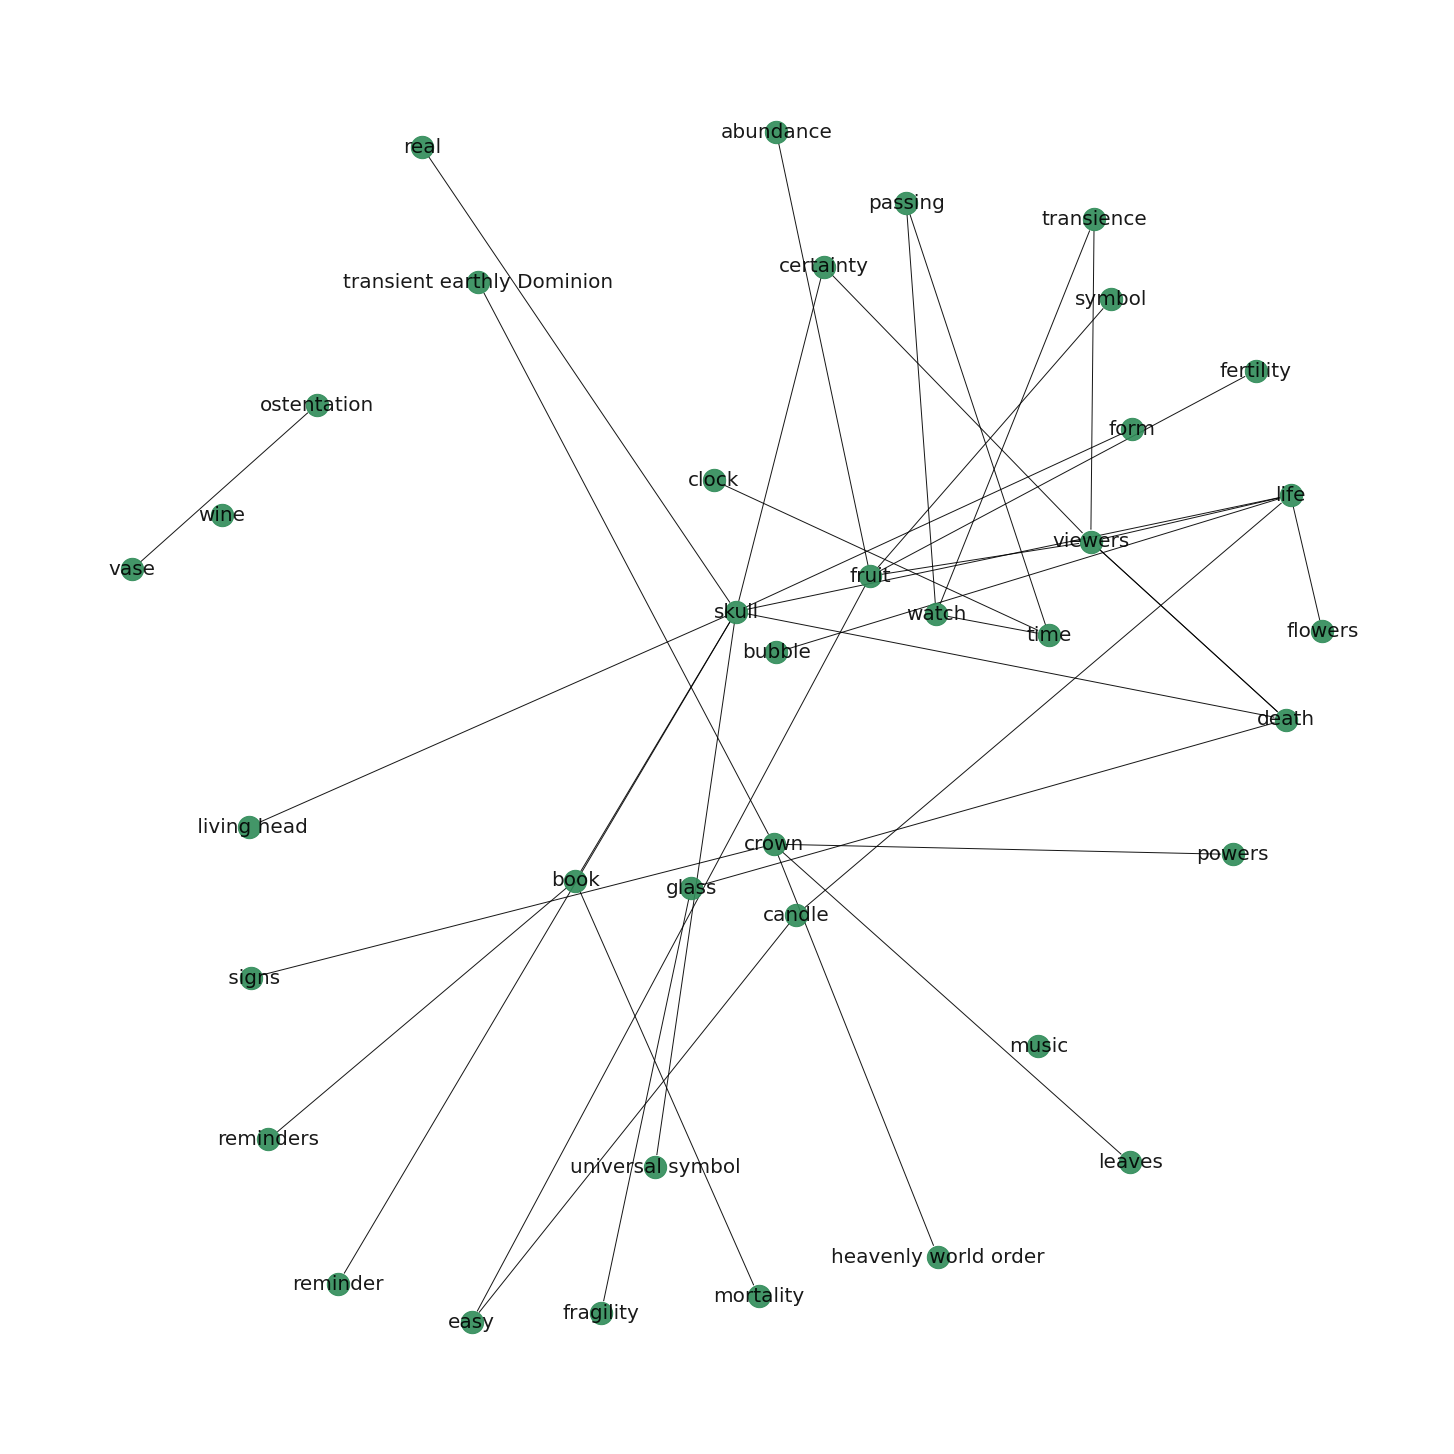

In [76]:
pos = nx.spring_layout(SG, k=3*1/np.sqrt(len(SG.nodes())), iterations=20)
plt.figure(figsize=(20,20))
nx.draw(SG, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, arrowsize=0.001, node_color='seagreen', alpha=0.9,
            labels={node: node for node in SG.nodes()}, font_size=20)
plt.axis('off')

In [77]:
file_loc = "data/validation_ids.txt"

val_dict = {}

with open( file_loc, "r") as f:
    for id, line in enumerate(f):
        tags = line.split('[')[1].split(']')[0].split(' ')
        objects_and_meanings = []
        
            
        for tag in line.split('[')[1].split(']')[0].split(' '):
            if tag:
                object = tag2node[int(tag)-1]
                meanings = []
                for node in DG.nodes:
                    if object in node.lower():
                        meanings.append(nx.descendants(DG, node))
                        print(node)
                objects_and_meanings.append({object: meanings})
        val_dict[id] = objects_and_meanings    
        print(id, line.split('[')[1].split(']')[0].split(' '))
       

NameError: name 'tag2node' is not defined

In [78]:
val_dict

{}

In [79]:
# import json

# from json import dumps, loads, JSONEncoder, JSONDecoder
import pickle as pkl

with open('val_objects_and_meaning.pkl', 'wb') as f:
    pkl.dump(val_dict, f)

In [80]:
for tag in id2node:
    print(nx.descendants(DG, tag))

NameError: name 'id2node' is not defined

In [81]:
val_dict

{}

In [82]:
type(val_dict)

dict

In [83]:
import sys
sys.path.insert(0,'../fine_art_asssociations_meanings_vision')

In [84]:
from vision.vanitas_utils import VanitasDataset

ModuleNotFoundError: No module named 'mrcnn'

In [85]:
nx.descendants(DG, 'the lobster')

NetworkXError: The node the lobster is not in the graph.

In [86]:
def save_admatrix_nodelist(g, src_dir, l, r):
    if not os.path.isdir(src_dir):
        os.mkdir(src_dir)
    admatix = nx.adjacency_matrix(g).todense()
    print(admatix.shape)
    np.savetxt(os.path.join(src_dir, "vanitas_meaning_AM_train.csv"), np.array(admatix, dtype=np.int), delimiter=",")

    print(len(g.nodes))
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_train.csv'), 'w', newline='') as myfile:
         
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))
    
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_objects_train.csv'), 'w', newline='') as myfile:
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))
    
    with open(os.path.join(src_dir, 'vanitas_meaning_NL_meanings_train.csv'), 'w', newline='') as myfile:
         wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
         wr.writerow(list(g.nodes))

In [87]:
save_admatrix_nodelist(SG, 'final_KG_train', l, r)

(38, 38)
38


In [88]:
corr = ''

for key in object2meanings.keys():
    for value in object2meanings[key]:
        for items in value:
            for item in items:
                corr += "{0} -> {1}, ".format(key, item)
        

In [89]:
corr

'skull -> reminder, skull -> certainty, skull -> death, skull -> universal symbol, skull -> death, skull -> form, skull ->  living head, skull -> life, skull -> real, flowers -> life, watch -> transience, watch -> time, watch -> passing, watch -> time, fruit -> easy, fruit -> fertility, fruit -> abundance, fruit -> symbol, fruit -> viewers, candle -> easy, candle -> life, bubble -> life, book -> reminders, book -> mortality, book -> skull, glass -> death, glass -> fragility, vase -> ostentation, crown -> leaves, crown -> powers, crown ->  signs, crown -> transient earthly Dominion, crown -> heavenly world order, clock -> time, '

In [90]:
SG

In [91]:
SG

In [92]:
nx.write_gpickle(SG, 'data/final_KG.pkl')

AttributeError: Can't pickle local object 'subgraph_view.<locals>.reverse_edge'

In [93]:
with open('data/gold_standard.pkl', 'rb') as f:
    gold_standard = pkl.load(f)

In [94]:
#gold_standard['generic']

In [173]:
hard_true_positives = 0
hard_false_positives = 0

soft_true_positives = 0
soft_false_positives = 0

hard_false_negatives = 0
soft_false_negatives = 0

for key in SG:
    if key not in gold_standard['generic']:
        soft_false_positives +=len(SG[key])
        hard_false_positives +=len(SG[key])
        continue
        
    for pred in SG[key]: 
        is_label = False
        for label in gold_standard['generic'][key]:
            if pred.lower() == label.lower():
                hard_true_positives +=1
                soft_true_positives +=1
                islabel = True
                break
            elif pred.lower() in label.lower():
                soft_true_positives +=1
                hard_false_negatives +=1
                is_label = True
                break
                
        if not is_label:
            soft_false_positives +=1
            hard_false_positives +=1 
            

for key in gold_standard['generic'].keys():
    if key not in SG:
        hard_false_negatives += len(gold_standard['generic'][key])
        soft_false_negatives
        continue
        
    for label in gold_standard['generic'][key]:
        is_pred = False
        for pred in SG[key]: 
            if pred.lower() == label.lower():
                is_pred = True
                break
            elif pred.lower() in label.lower():
                is_pred = True
                break
        if not is_pred:
            soft_false_negatives +=1
            hard_false_negatives +=1
        
    
            

In [174]:
hard_true_positives

4

In [175]:
hard_false_positives

31

In [176]:
soft_true_positives

11

In [177]:
soft_false_positives

31

In [178]:
hard_false_negatives

90

In [179]:
soft_false_negatives

49

In [180]:
hard_precision = hard_true_positives/(hard_true_positives+hard_false_positives)
print(hard_precision)

0.11428571428571428


In [181]:
soft_precision = soft_true_positives/(soft_true_positives+soft_false_positives)
print(soft_precision)

0.2619047619047619


In [182]:
hard_recall = hard_true_positives/(hard_true_positives+hard_false_negatives)
print(hard_recall)

0.0425531914893617


In [183]:
soft_recall = soft_true_positives/(soft_true_positives+soft_false_negatives)
print(soft_recall)

0.18333333333333332


In [184]:
def calc_precision(TP, FP):
    return TP/(TP+FP)

def calc_recall (TP, FN):
    return TP/(TP + FN)

def calc_f1(p, r):
    return 2*p*r/(p+r)

In [185]:
calc_f1(soft_precision, soft_recall)

0.2156862745098039

In [186]:
calc_f1(hard_precision, hard_recall)

0.06201550387596899

In [109]:
from sentence_transformers import SentenceTransformer
model_embed = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

In [110]:
sentences = ["This is an example sentence", "Each sentence is converted"]

embeddings = model_embed.encode(sentences)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [111]:
def cos_sim(e1, e2):
    e2_r = e2.reshape(1,-1)
    return cosine_similarity(e1, e2_r)


def calc_metrics(s, S, threshold):
    
    e_s = model_embed.encode(s).reshape(1,-1)
    e_S = model_embed.encode(S)
    
    rejected = []
    
    TP = 0
    FP = 0
    
    under_threshold_for_all = True
    
    for i in range(len(e_S)):
        
        if cos_sim(e_s, e_S[i])[0][0] >= threshold:
            TP +=1
            under_threshold_for_all = False
        else:
            rejected.append(S[i])
    
    if under_threshold_for_all:
        FP +=1
    
    sim_sent = [(cos_sim(e_s, e_S[i])[0][0], S[i]) for i in range(len(e_S))]

    
    return set(rejected), TP, FP, sim_sent

In [112]:

threshold = 0.7

FP = 0
FN = 0
TP = 0

for key in SG:
    rejected_all = None
    for pred in SG[key]: 
        if key in gold_standard['generic']:
            rejected, TP_key, FP_key, sim_sent = calc_metrics(pred, gold_standard['generic'][key], threshold)
            TP += TP_key
            FP += FP_key 
            
            if not rejected_all:
                rejected_all = rejected
            else:
                rejected_all = rejected_all.intersection(rejected)
            
#             print(sims)
    
            
            print(key, pred, sim_sent)
#             if max_sim > 0.75:
#                 print(key, pred, max_label, max_sim, 'pos')
#             else:
#                 print(key, pred, max_label, max_sim, 'neg')
        else:
            FP += len(SG[key])
    
    if rejected_all:
        FN += len(rejected_all)
    
for key in gold_standard['generic']:
    if key not in SG:
        FN += len(gold_standard['generic'][key])

watch transience [(1.0, 'transience'), (0.62833834, 'limitation of time'), (0.7025158, 'passage of time'), (0.46879482, 'inevitability of death'), (0.6801032, 'achievements'), (0.47878703, 'death'), (0.7264788, 'time'), (0.52516603, 'brevity of life'), (0.5602604, 'passing of life')]
watch time [(0.72647893, 'transience'), (0.7193811, 'limitation of time'), (0.8733995, 'passage of time'), (0.48909035, 'inevitability of death'), (0.76239693, 'achievements'), (0.5008663, 'death'), (0.9999999, 'time'), (0.6401267, 'brevity of life'), (0.6096179, 'passing of life')]
watch passing [(0.72869825, 'transience'), (0.71249676, 'limitation of time'), (0.7710018, 'passage of time'), (0.5118518, 'inevitability of death'), (0.68662953, 'achievements'), (0.59815526, 'death'), (0.77925885, 'time'), (0.57060194, 'brevity of life'), (0.79467523, 'passing of life')]
bubble life [(0.6804925, 'transience'), (0.5901983, 'death'), (0.7620012, 'brevity of life')]
candle easy [(0.7039758, 'human soul'), (0.440

In [113]:
FN

70

In [114]:
FP

46

In [115]:
TP

44

In [116]:
p = calc_precision(TP, FP)
r =  calc_recall (TP, FN)
f1 =  calc_f1(p, r)

print(p)
print(r)
print(f1)

0.4888888888888889
0.38596491228070173
0.4313725490196078


In [117]:
end_to_end_labels = gold_standard.copy()

In [118]:
end_to_end_labels

{'generic': {'skull': ['fragility of life',
   'inevitability of mortality',
   'passage of time',
   'inevitability of death',
   'achievements',
   'egotism of life',
   'transience of mankind',
   'transience of earthly pursuits',
   'death',
   'futility of worldly pursuits'],
  'fruit': ['aging',
   'passing of time',
   'fertility',
   'wealth',
   'fall of man',
   'eroticism',
   'truth',
   'salvation',
   'wisdom',
   'original sin',
   'brevity of life',
   'decay'],
  'watch': ['transience',
   'limitation of time',
   'passage of time',
   'inevitability of death',
   'achievements',
   'death',
   'time',
   'brevity of life',
   'passing of life'],
  'hourglass': ['transience',
   'limitation of time',
   'inevitability of death',
   'death',
   'time',
   'brevity of life'],
  'books': ['human curiosity',
   'knowledge',
   'death',
   'enjoyment',
   'luxuries of life',
   'arts and sciences'],
  'shells': ['exoticism',
   'wealth',
   'vanity',
   'uncouth ostentatiou

In [140]:
detections = [{'img': '5aadcb7882.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': 'fed306f057.jpg',
  'class_ids': [10],
  'scores': [0.93937874],
  'classes': ['violin']},
 {'img': '8d4205809e.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': '05d9284b10.jpg',
  'class_ids': [1],
  'scores': [0.9398588],
  'classes': ['Skull']},
 {'img': '2424027234.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': 'a861ea64fb.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': '2424133048.jpg',
  'class_ids': [21, 1],
  'scores': [0.94296116, 0.90677196],
  'classes': ['Vase', 'Skull']},
 {'img': 'c61e32741c.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': '8ad536eb55.jpg',
  'class_ids': [1],
  'scores': [0.99696594],
  'classes': ['Skull']},
 {'img': '86e7643246.jpg',
  'class_ids': [1],
  'scores': [0.9362383],
  'classes': ['Skull']},
 {'img': 'd6c400594b.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': 'd906904f4f.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': '8862bd2fb0.jpg',
  'class_ids': [1],
  'scores': [0.91473407],
  'classes': ['Skull']},
 {'img': 'fd87965987.jpg',
  'class_ids': [1],
  'scores': [0.9935489],
  'classes': ['Skull']},
 {'img': 'a964dd4aef.jpg',
  'class_ids': [1],
  'scores': [0.96582496],
  'classes': ['Skull']},
 {'img': 'db39fb81b1.jpg', 'class_ids': [], 'scores': [], 'classes': []},
 {'img': 'aa93e919ac.jpg',
  'class_ids': [1],
  'scores': [0.9751281],
  'classes': ['Skull']},
 {'img': 'e624f5dfe2.jpg', 'class_ids': [], 'scores': [], 'classes': []}]

In [135]:
def cos_sim(e1, e2):
    e2_r = e2.reshape(1,-1)
    return cosine_similarity(e1, e2_r)


def calc_metrics(s, S, threshold):
    
    e_s = model_embed.encode(s).reshape(1,-1)
    e_S = model_embed.encode(S)
    
    rejected = []
    
    TP = 0
    FP = 0
    
    under_threshold_for_all = True
    
    for i in range(len(e_S)):
        
        if cos_sim(e_s, e_S[i])[0][0] >= threshold:
            TP +=1
            under_threshold_for_all = False
        else:
            rejected.append(S[i])
    
    if under_threshold_for_all:
        FP +=1
    
    sim_sent = [(cos_sim(e_s, e_S[i])[0][0], S[i]) for i in range(len(e_S))]

    
    return set(rejected), TP, FP, sim_sent

In [167]:
TP_full_sem = 0
FP_full_sem = 0
FN_full_sem = 0
threshold = 0.7


for d in detections:
# for key in end_to_end_labels.keys():
    key = d['img']
    
    if key not in end_to_end_labels:
        continue
    
    if type(end_to_end_labels[key]) == dict:
        
        
        obj_labels = end_to_end_labels[key].keys()
        rejected_all = None
        
        obj_preds = d['classes']
        
        meaning_preds = []
        
        for obj_p in obj_preds:
            obj_p = obj_p.lower()
#             print(obj_p)
            if obj_p not in SG:
                continue
            meaning_preds.extend(SG[obj_p.lower()])
        
        meaning_preds = list(set(meaning_preds))
#         print(meaning_preds)
        
        meaning_labels = []
        for obj_l in obj_labels:
            meaning_labels.extend(end_to_end_labels[key][obj_l])
            
        meaning_labels = list(set(meaning_labels))
        
        
        for pred in meaning_preds:
            rejected, TP_key, FP_key, sim_sent = calc_metrics(pred, meaning_labels, threshold)
            TP_full_sem += TP_key
            FP_full_sem += FP_key 

            if not rejected_all:
                rejected_all = rejected
            else:
                rejected_all = rejected_all.intersection(rejected)
    else:
        FN_full_sem += len(end_to_end_labels[key])
        
    if rejected_all:
        FN_full_sem += len(rejected_all)

In [171]:
FN_full_sem

4

In [168]:
p = calc_precision(TP_full_sem, FP_full_sem)
print(p)

0.4827586206896552


In [169]:
r = calc_recall(TP_full_sem, FN_full_sem)
print(r)

0.7777777777777778


In [170]:
calc_f1(p,r)

0.5957446808510638

In [190]:
hard_true_positives = 0
hard_false_positives = 0

soft_true_positives = 0
soft_false_positives = 0

hard_false_negatives = 0
soft_false_negatives = 0


for d in detections:
# for key in end_to_end_labels.keys():
    key = d['img']
    
    if key not in end_to_end_labels:
        continue
    
    if type(end_to_end_labels[key]) == dict:
        
        
        obj_labels = end_to_end_labels[key].keys()
        rejected_all = None
        
        obj_preds = d['classes']
        
        meaning_preds = []
        
        for obj_p in obj_preds:
            obj_p = obj_p.lower()
#             print(obj_p)
            if obj_p not in SG:
                continue
            meaning_preds.extend(SG[obj_p.lower()])
        
        meaning_preds = list(set(meaning_preds))
#         print(meaning_preds)
        
        meaning_labels = []
        for obj_l in obj_labels:
            meaning_labels.extend(end_to_end_labels[key][obj_l])
            
        meaning_labels = list(set(meaning_labels))
        
        for pred in meaning_preds:
            is_label = False
            for label in meaning_labels:
                if pred.lower() == label.lower():
                    hard_true_positives +=1
                    soft_true_positives +=1
                    islabel = True
                    break
                elif pred.lower() in label.lower():
                    soft_true_positives +=1
                    hard_false_negatives +=1
                    is_label = True
                    break
                
            if not is_label:
                    soft_false_positives +=1
                    hard_false_positives +=1 
            

        for label in meaning_labels:
            is_pred = False
            for pred in meaning_preds:
                if pred.lower() == label.lower():
                    is_pred = True
                    break
                elif pred.lower() in label.lower():
                    is_pred = True
                    break
        if not is_pred:
            soft_false_negatives +=1
            hard_false_negatives +=1
                




In [191]:
p = calc_precision(soft_true_positives, soft_false_positives)
r =  calc_recall (soft_true_positives, soft_false_negatives)
f1 =  calc_f1(p, r)

print(p)
print(r)
print(f1)

0.11538461538461539
0.3333333333333333
0.17142857142857146


In [193]:
p = calc_precision(hard_true_positives, hard_false_positives)
r =  calc_recall(hard_true_positives, hard_false_negatives)
f1 =  calc_f1(p, r)

print(p)
print(r)
print(f1)

0.041666666666666664
0.1111111111111111
0.06060606060606061
